<a href="https://colab.research.google.com/github/ChuloIva/Data_cleaning_examples/blob/main/Clean001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from tabula import read_pdf
from tabula import convert_into

In [ ]:
# #Convert pdf to csv
# file = r"C:\Users\Van Cloui\Desktop\POSLOVNO\Ines\Dfs\Bigclean\MP01(055) - Popis MP racuna - 6 - 12 mj 2022.pdf"
# dfs = read_pdf(file, pages="1", multiple_tables=True)
# output_csv = r"C:\Users\Van Cloui\Desktop\POSLOVNO\Ines\Dfs\Bigclean\Racuni01.csv"
# dfs = convert_into(file, output_csv, output_format='csv', lattice=False, stream=False, pages="all")

df_dirty =r"C:\Users\Van Cloui\Desktop\POSLOVNO\Ines\Dfs\Bigclean\Racuni01.csv"
#read the file in a dataframe
df = pd.read_csv(df_dirty, encoding= 'unicode_escape')

#Making new columns out of date, orderID and soldBY

print(df)

PNG examples of data that needs cleaning

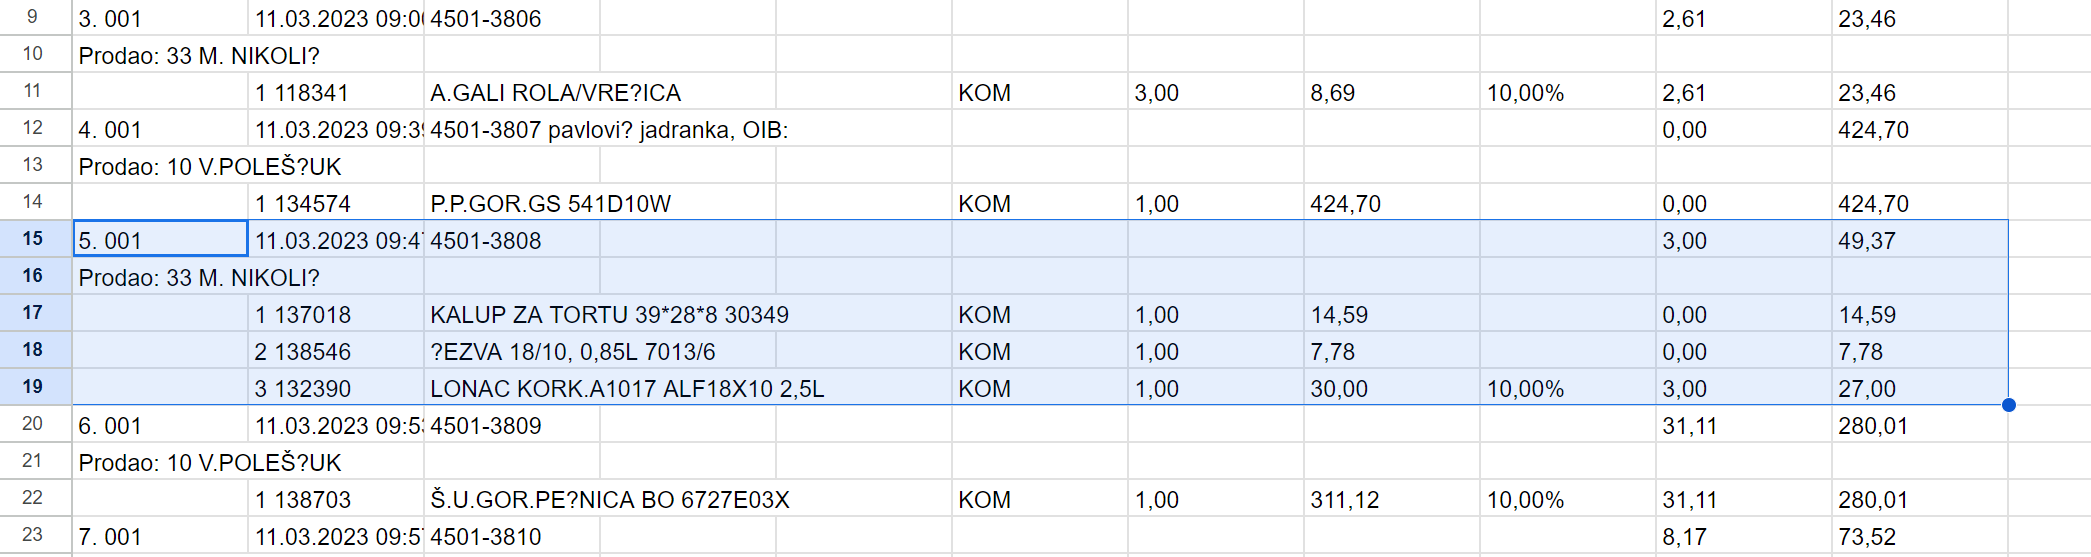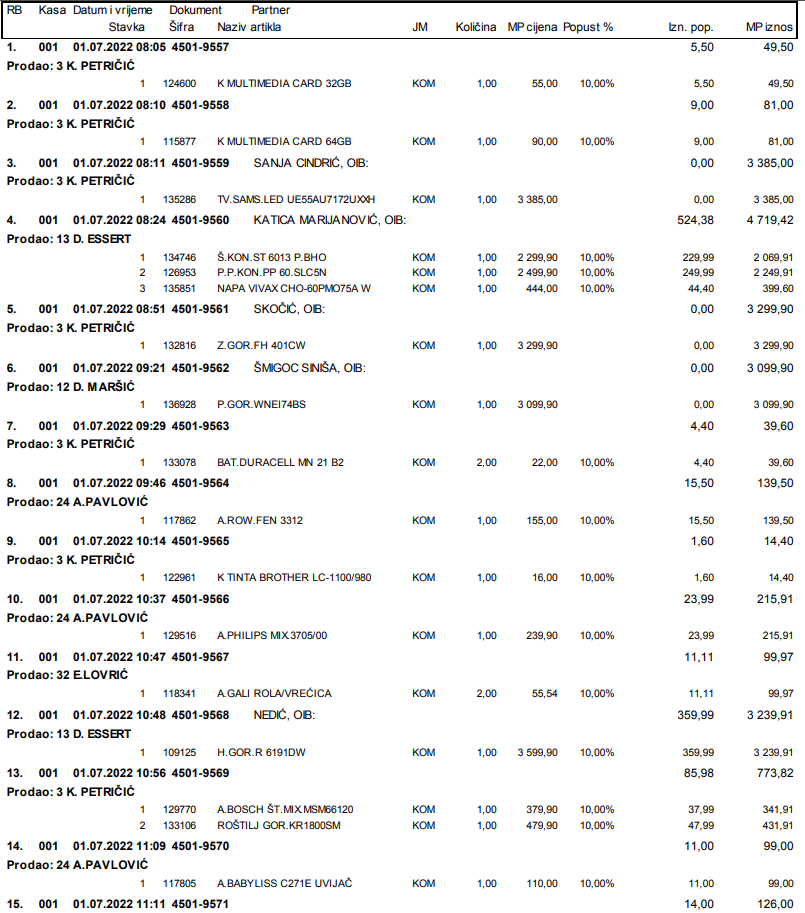

In [ ]:

#Date and time extracting.
# regex to extract date and time column
pattern = r"^(\d{1,2}\.\d{1,2}\.\d{4}\s\d{1,2}:\d{2})$"
# use str.extract with capture group
df["Datetime"] = df["Datum i vrijeme"].str.extract(pattern, expand=False)


#OrderID extracting
# regex to extract broj racuna
pattern_broj_rc = r"^(4501-.*)"
# use str.extract with capture group
df["OrderID"] = df["Dokument Partner"].str.extract(pattern_broj_rc, expand=False)

#Extracting Seller

# regex to extract Seller
pattern_seller = r"^(Prodao:\s.*)"

# use str.extract with capture group
df["Prodao"] = df["RB Kasa"].str.extract(pattern_seller, expand=False)

#Shifting Prodao Column by one row up
df['Prodao'] = df['Prodao'].shift(-1)
########

#Filling the missing values in the new columns
df["OrderID"] = df["OrderID"].ffill()
df["Prodao"] = df["Prodao"].ffill()
df["Datetime"] = df["Datetime"].ffill()

#Filter out everything except the exact things sold
df['Unnamed: 5'].fillna('', inplace=True)
df = df.loc[df['Unnamed: 5'].str.contains('KOM')]

# Fixing the issue with not parsing first collumn correctly
#Add a space if the row has only one character
df['Datum i vrijeme'] = df['Datum i vrijeme'].apply(lambda x: x + ' ' if len(x) == 1 else x)
#Merge first two columns
df["mix"] = df["Datum i vrijeme"] + df["Dokument Partner"]
#Split into Num in order and prodID and Product name
df[['Num in order', 'Product Name']] = df['mix'].str.extract(r'(\d+[^a-zA-Z.]+)(.*)')
# split the column using the space delimiter
df[['Number in order', 'ProdID']] = df['Num in order'].str.split(' ', n=1, expand=True)


# clean column 'ProdID' by removing any non-numeric characters
df['ProdID'] = df['ProdID'].replace('[^0-9]', '', regex=True)
# convert column 'A' to integer data type
df['ProdID'] = df['ProdID'].astype(int)

# clean column 'OdrerID' by removing any non-numeric characters except "-"
# extract pattern using regex
df['OrderID'] = df['OrderID'].str.extract(r'(\d{4}-\d{4})')


# rename columns
df = df.rename(columns={'Unnamed: 6': 'Qty',
                        'Unnamed: 7': 'Price per unit',
                        'Unnamed: 8': 'Discount',
                        'Unnamed: 9': 'Amt Discount',
                        'Unnamed: 10': 'Total Price'})
# reorder columns
df = df.reindex(columns=['Datetime', 'Prodao', 'OrderID', 'Number in order', 'ProdID', 'Product Name',
                         'Qty', 'Price per unit', 'Discount', 'Amt Discount', 'Total Price'])
# Fill Na with zeroes
df = df.fillna(0)


print(df)
# df.to_csv(r"C:\Users\icuul\Desktop\Ines\Big\test03_final.csv")

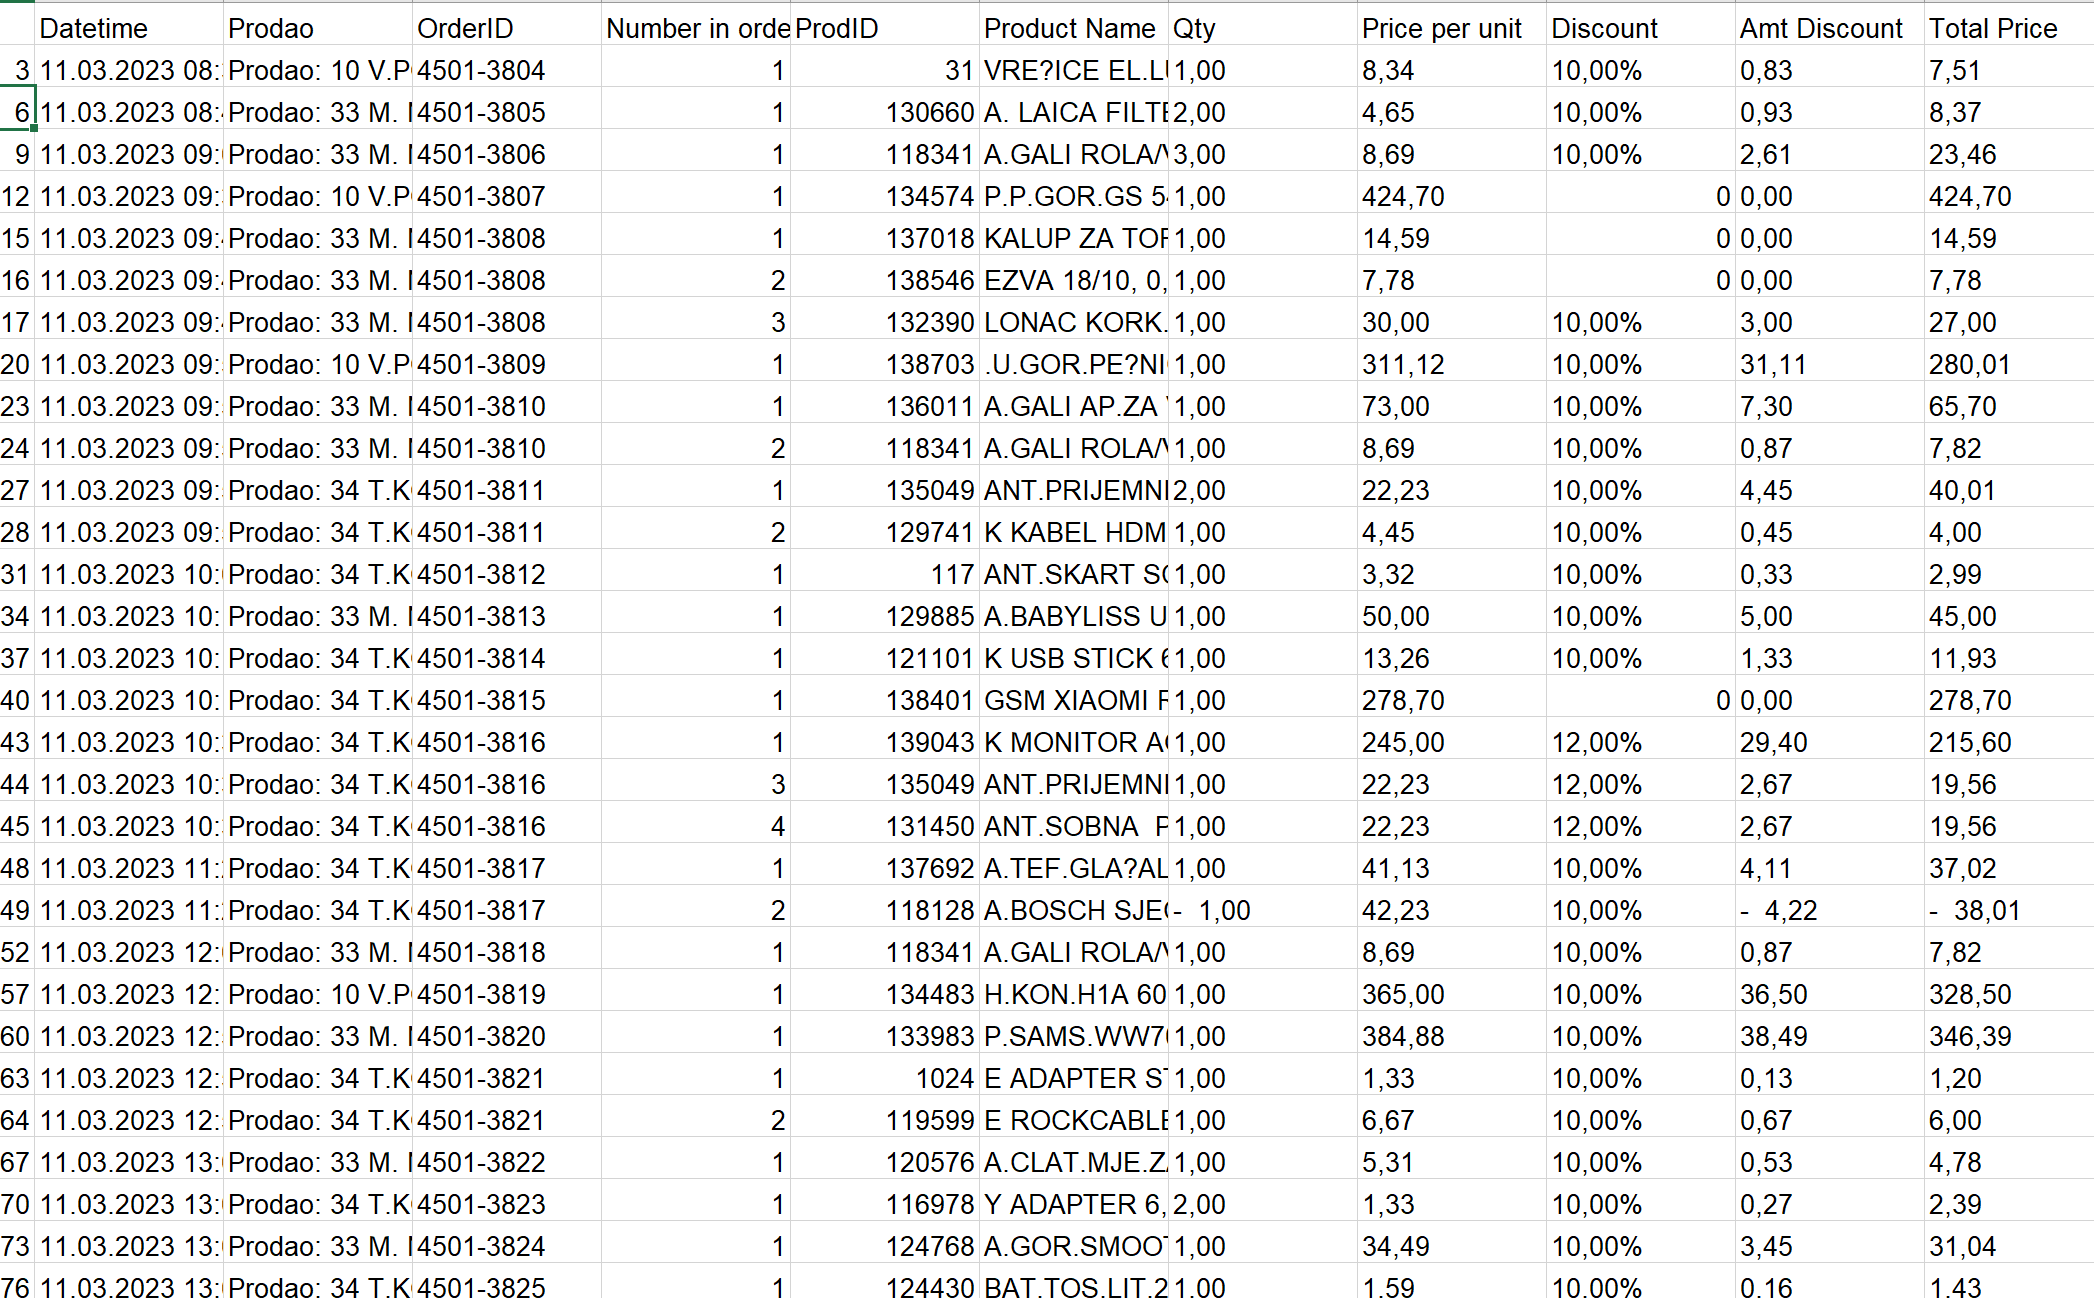

Company confidential data so not including the original file in the reposit. Including png's of before and after